## DATA COLLECTION

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
# Load the dataset
df = pd.read_csv("world_population.csv")


## EXPLORATORY DATA ANALYSIS 

In [66]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [67]:
df.shape

(234, 17)

In [68]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [69]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [71]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [72]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [73]:
df.duplicated().sum()

0

## DATA PREPROCESSING

In [74]:
# Drop unnecessary columns
df = df.drop(columns=["Rank", "CCA3", "Capital"], errors="ignore")

In [75]:
# Rename columns for easier access
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns={"area_(km²)": "area_km²", "density_(per_km²)": "density_per_km²"}, inplace=True)

In [76]:
df.rename(columns = {'country/territory' :'country'},inplace = True)

In [77]:
df

,country,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_km²,density_per_km²,growth_rate,world_population_percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [78]:
# Convert population columns to numeric
population_columns = ["1970_population", "1980_population", "1990_population","2000_population", 
                      "2010_population", "2015_population" ,"2020_population", "2022_population"]
df[population_columns] = df[population_columns].apply(pd.to_numeric, errors="coerce")

In [79]:
df[population_columns]

,1970_population,1980_population,1990_population,2000_population,2010_population,2015_population,2020_population,2022_population
0,10752971,12486631,10694796,19542982,28189672,33753499,38972230,41128771
1,2324731,2941651,3295066,3182021,2913399,2882481,2866849,2842321
2,13795915,18739378,25518074,30774621,35856344,39543154,43451666,44903225
3,27075,32886,47818,58230,54849,51368,46189,44273
4,19860,35611,53569,66097,71519,71746,77700,79824
...,...,...,...,...,...,...,...,...
229,9377,11315,13454,14723,13142,12182,11655,11572
230,76371,116775,178529,270375,413296,491824,556048,575986
231,6843607,9204938,13375121,18628700,24743946,28516545,32284046,33696614
232,4281671,5720438,7686401,9891136,13792086,16248230,18927715,20017675


## FEATURE ENGINEERING

In [80]:
# Calculate population change over years
df["population_change_2000_2022"] = df["2022_population"] - df["2000_population"]
df["growth_2000_2022_%"] = ((df["2022_population"] - df["2000_population"]) / df["2000_population"]) * 100


In [81]:
df["population_change_2000_2022"]

0      21585789
1       -339700
2      14128604
3        -13957
4         13727
         ...   
229       -3151
230      305611
231    15067914
232    10126539
233     4485861
Name: population_change_2000_2022, Length: 234, dtype: int64

In [82]:
# Categorize growth rate
def classify_growth(rate):
    if rate > 2:
        return "High Growth"
    elif 1 <= rate <= 2:
        return "Moderate Growth"
    elif 0 <= rate < 1:
        return "Low Growth"
    else:
        return "Negative Growth"

df["growth_category"] = df["growth_rate"].apply(classify_growth)
df["growth_category"]


0      Moderate Growth
1           Low Growth
2      Moderate Growth
3           Low Growth
4      Moderate Growth
            ...       
229         Low Growth
230    Moderate Growth
231    Moderate Growth
232    Moderate Growth
233    Moderate Growth
Name: growth_category, Length: 234, dtype: object

In [83]:
df.sort_values(by='growth_2000_2022_%', ascending=True).head(10)

,country,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_km²,density_per_km²,growth_rate,world_population_percentage,population_change_2000_2022,growth_2000_2022_%,growth_category
153,Northern Mariana Islands,Oceania,49551,49587,51514,54087,80338,48002,17613,10143,464,106.7909,1.0014,0.00,-30787,-38.321840,Moderate Growth
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,-13957,-23.968745,Low Growth
117,Lithuania,Europe,2750055,2820267,2963765,3139019,3599637,3785847,3521206,3210147,65300,42.1142,0.9869,0.03,-849582,-23.601880,Low Growth
126,Marshall Islands,Oceania,41569,43413,49410,53416,54224,46047,31988,23969,181,229.6630,0.9886,0.00,-12655,-23.338374,Low Growth
133,Moldova,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04,-978577,-23.016822,Moderate Growth
111,Latvia,Europe,1850651,1897052,1991955,2101530,2392530,2689391,2572037,2397414,64559,28.6660,0.9876,0.02,-541879,-22.648786,Low Growth
25,Bosnia and Herzegovina,Europe,3233526,3318407,3524324,3811088,4179350,4494310,4199820,3815561,51209,63.1437,0.9886,0.04,-945824,-22.630888,Low Growth
226,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.00,-141,-21.658986,Low Growth
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00,-3151,-21.401888,Low Growth
218,Ukraine,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50,-9178016,-18.776723,Low Growth


## VISUALIZATION

C:\Users\ABHISHEK S R\AppData\Local\Temp\ipykernel_26980\70577004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Growth_Rate_by_Continent = sns.barplot(x="continent", y="growth_rate", data=df, palette="coolwarm")
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

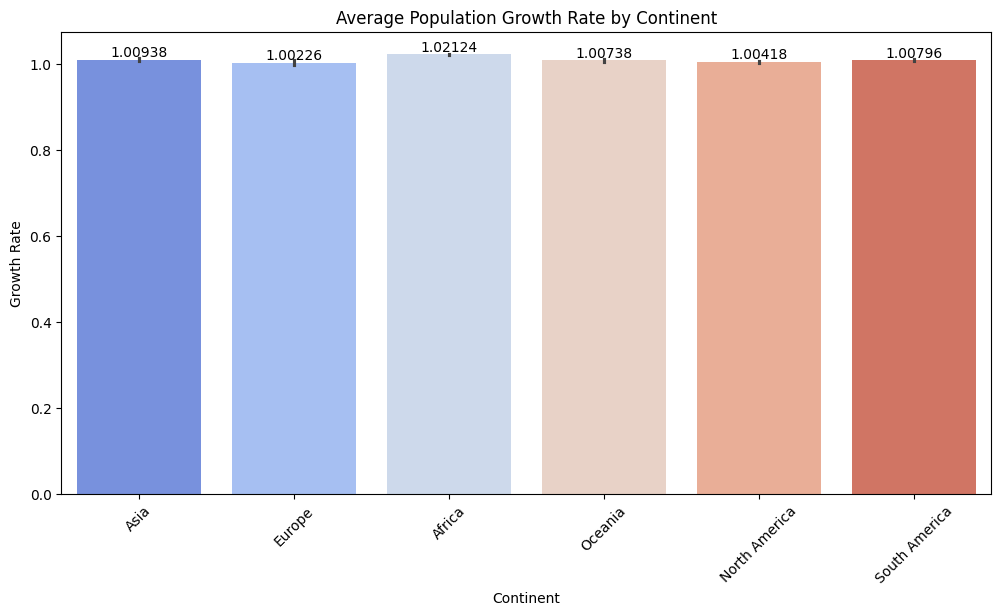

In [84]:
# Growth Rate by Continent
plt.figure(figsize=(12, 6))
Growth_Rate_by_Continent = sns.barplot(x="continent", y="growth_rate", data=df, palette="coolwarm")
for i in Growth_Rate_by_Continent.containers:
    Growth_Rate_by_Continent.bar_label(i,fontsize=10)
plt.xlabel("Continent")
plt.ylabel("Growth Rate")
plt.title("Average Population Growth Rate by Continent")
plt.xticks(rotation=45)
plt.show()

C:\Users\ABHISHEK S R\AppData\Local\Temp\ipykernel_26980\2887742083.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022_population", y="country", data=top_10_populous, palette="viridis")
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.ge

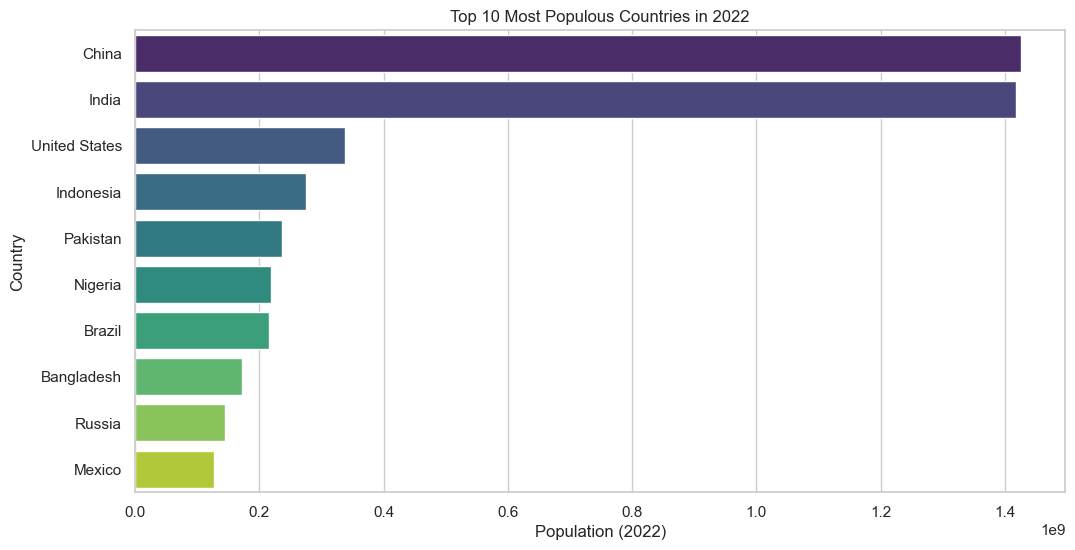

In [100]:
# Set visualization style
sns.set_theme(style="whitegrid")

# Top 10 most populous countries in 2022
top_10_populous = df.nlargest(10, "2022_population")

# Bar plot for top 10 most populous countries
plt.figure(figsize=(12, 6))
sns.barplot(x="2022_population", y="country", data=top_10_populous, palette="viridis")
plt.xlabel("Population (2022)")
plt.ylabel("Country")
plt.title("Top 10 Most Populous Countries in 2022")
plt.show()


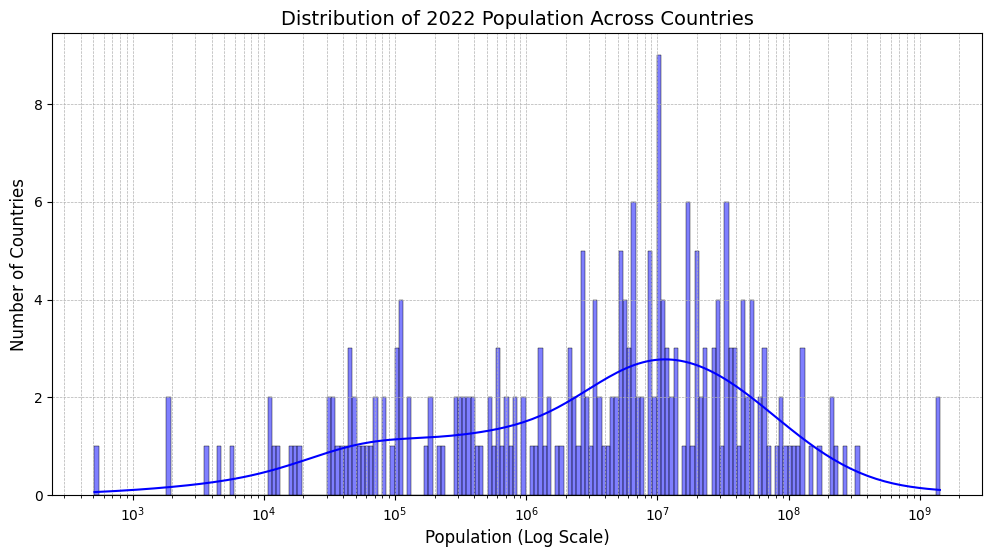

In [85]:

# Population Distribution
plt.figure(figsize=(12, 6))

# Apply log scale to make the chart readable
sns.histplot(df["2022_population"], bins=200, kde=True, color="blue", log_scale=(True, False))

plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.title("Distribution of 2022 Population Across Countries", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


<Figure size 1200x600 with 0 Axes>

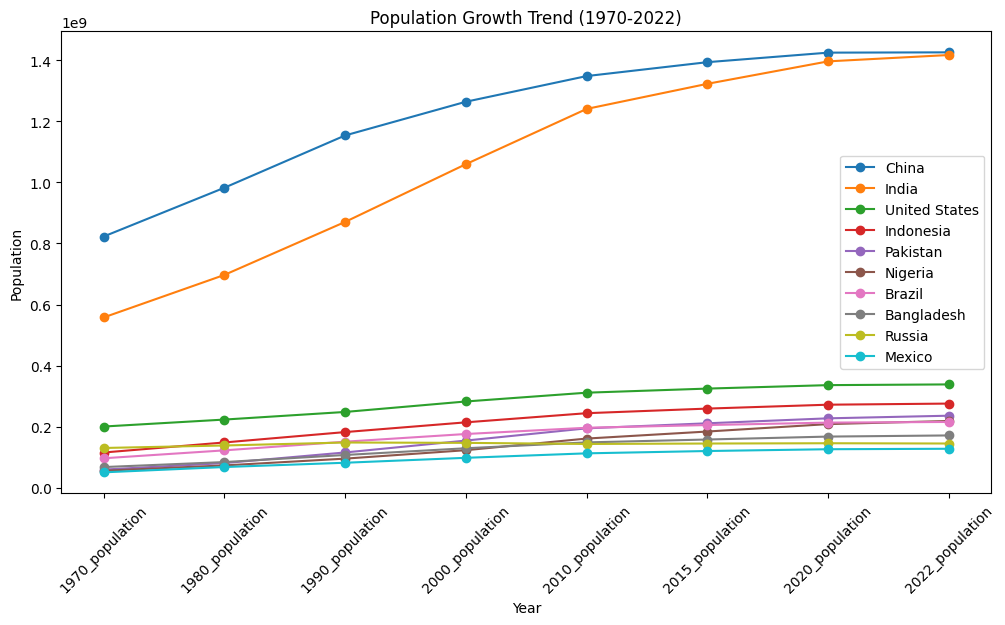

In [86]:
# Population Growth Trend Over Time (Top 10 Countries)
plt.figure(figsize=(12, 6))

top_10_countries = df.sort_values(by="2022_population", ascending=False).head(10)
plt.figure(figsize=(12, 6))

for country in top_10_countries["country"]:  
    years = ["1970_population", "1980_population", "1990_population", "2000_population", 
             "2010_population", "2015_population", "2020_population", "2022_population"]
    plt.plot(years, df[df["country"] == country][years].values.flatten(), marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Growth Trend (1970-2022)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

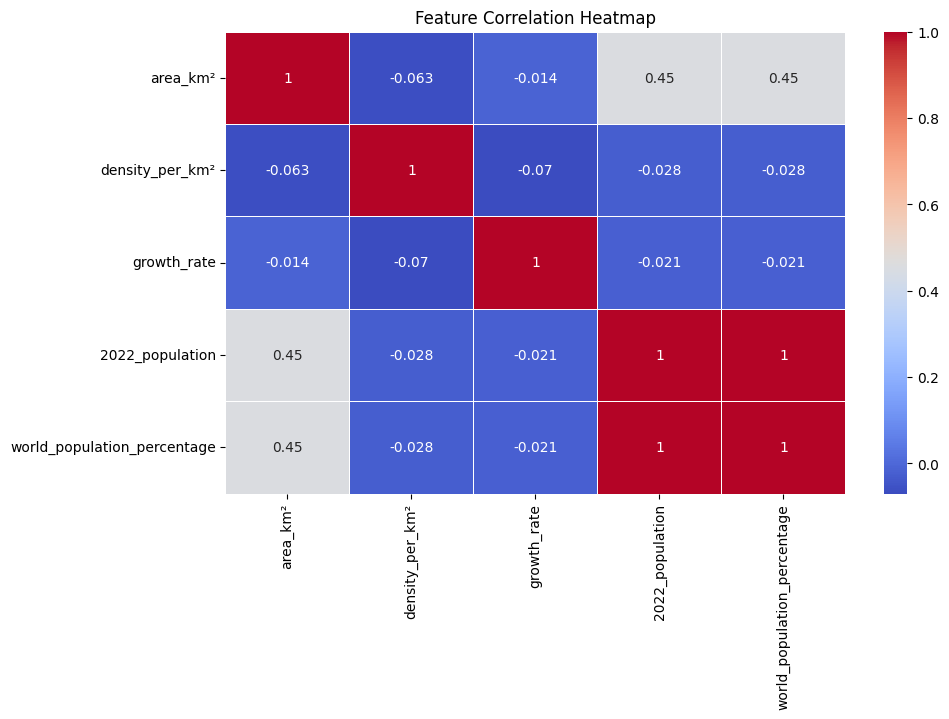

In [87]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["area_km²", "density_per_km²", "growth_rate", "2022_population", "world_population_percentage"]].corr(), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\ABHISHEK S R\AppData\Local\Temp\ipykernel_26980\4126937249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x="growth_rate", y="country", data=top_10_growth, palette="viridis")
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

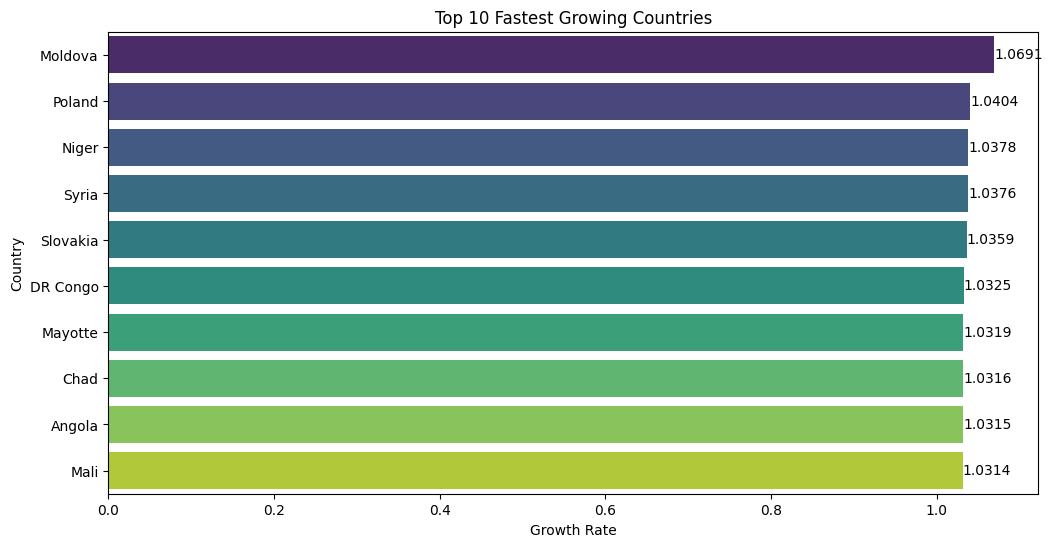

In [88]:
# Top 10 Fastest Growing Countries
top_10_growth = df.nlargest(10, "growth_rate")
plt.figure(figsize=(12, 6))
a = sns.barplot(x="growth_rate", y="country", data=top_10_growth, palette="viridis")
for i in a.containers:
    a.bar_label(i,fontsize=10)
plt.xlabel("Growth Rate")
plt.ylabel("Country")
plt.title("Top 10 Fastest Growing Countries")
plt.show()

C:\Users\ABHISHEK S R\AppData\Local\Temp\ipykernel_26980\319624554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="density_per_km²", data=top_10_area, palette="coolwarm")
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

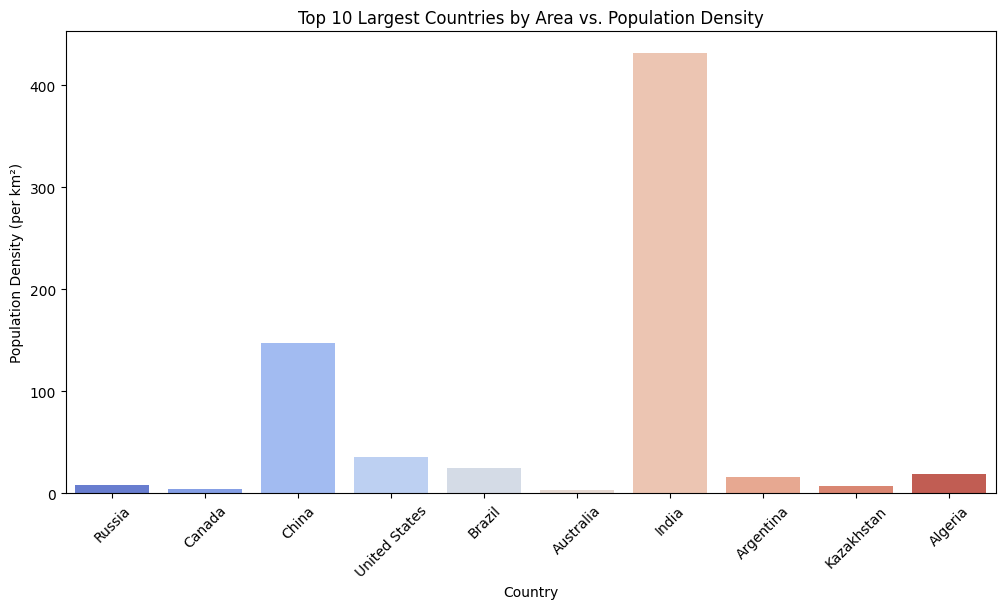

In [89]:
# Select the top 10 largest countries by area
top_10_area = df.nlargest(10, "area_km²")

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="country", y="density_per_km²", data=top_10_area, palette="coolwarm")

plt.xlabel("Country")
plt.ylabel("Population Density (per km²)")
plt.title("Top 10 Largest Countries by Area vs. Population Density")
plt.xticks(rotation=45)
plt.show()


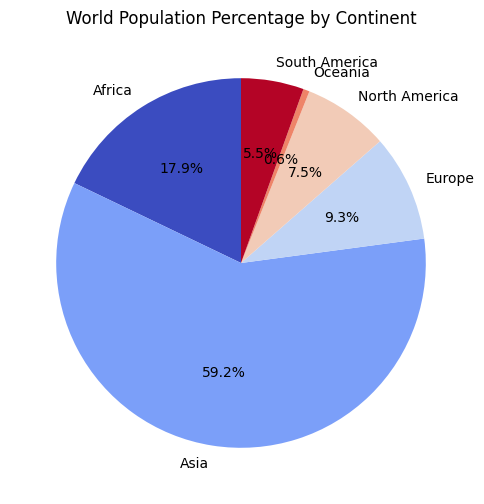

In [90]:
# Population Percentage by Continent
plt.figure(figsize=(10, 6))
df.groupby("continent")["world_population_percentage"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.ylabel("")
plt.title("World Population Percentage by Continent")
plt.show()

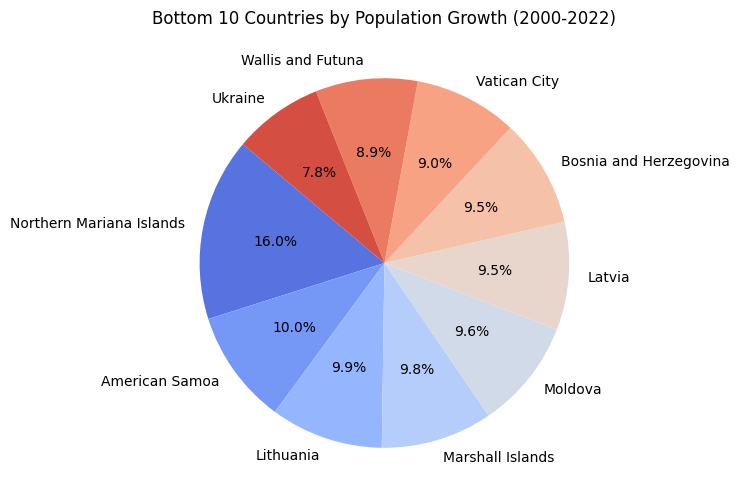

In [91]:
# Select the 10 countries with the lowest (slowest) growth from 2000 to 2022
bottom_10_growth = df.sort_values(by="growth_2000_2022_%", ascending=True).head(10)

# Ensure all values are non-negative (convert negative values to absolute)
bottom_10_growth["growth_2000_2022_%"] = bottom_10_growth["growth_2000_2022_%"].abs()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(bottom_10_growth["growth_2000_2022_%"], labels=bottom_10_growth["country"], 
        autopct="%1.1f%%", colors=sns.color_palette("coolwarm", 10), startangle=140)

# Add title
plt.title("Bottom 10 Countries by Population Growth (2000-2022)")
plt.show()



## MODEL BUILDING 

In [98]:
# Select features and target variable
features = ["2000_population", "2010_population", "2015_population", "2020_population", "growth_rate"]
target = "2022_population"

# Drop missing values in selected columns
df_model = df.dropna(subset=features + [target])

# Define X (features) and y (target)
X = df_model[features]
y = df_model[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## MODEL EVALUATION

In [101]:
# Make predictions for 2022
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")



Model Evaluation:
Mean Absolute Error (MAE): 273297.2385334238
R² Score: 0.9999034546147025


In [102]:
# Predict Population for 2030
df["predicted_2030_population"] = model.predict(df[features])

# Save results as a CSV file
df.to_csv("predicted_population_2030.csv", index=False)

# Display sample predictions
print("\nTop 10 Most Populated Countries in 2030 ")
print(df[["country", "2022_population", "predicted_2030_population"]].nlargest(10, "predicted_2030_population"))





Top 10 Most Populated Countries in 2030 (Predicted):
           country  2022_population  predicted_2030_population
41           China       1425887337               1.425988e+09
92           India       1417173173               1.417416e+09
221  United States        338289857               3.380666e+08
93       Indonesia        275501339               2.751723e+08
156       Pakistan        235824862               2.327938e+08
149        Nigeria        218541212               2.176079e+08
27          Brazil        215313498               2.149502e+08
16      Bangladesh        171186372               1.703501e+08
171         Russia        144713314               1.445480e+08
131         Mexico        127504125               1.274682e+08


C:\Users\ABHISHEK S R\AppData\Local\Temp\ipykernel_26980\3666391998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="predicted_2030_population", y="country", data=top_10_predicted, palette="magma")
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = groupe

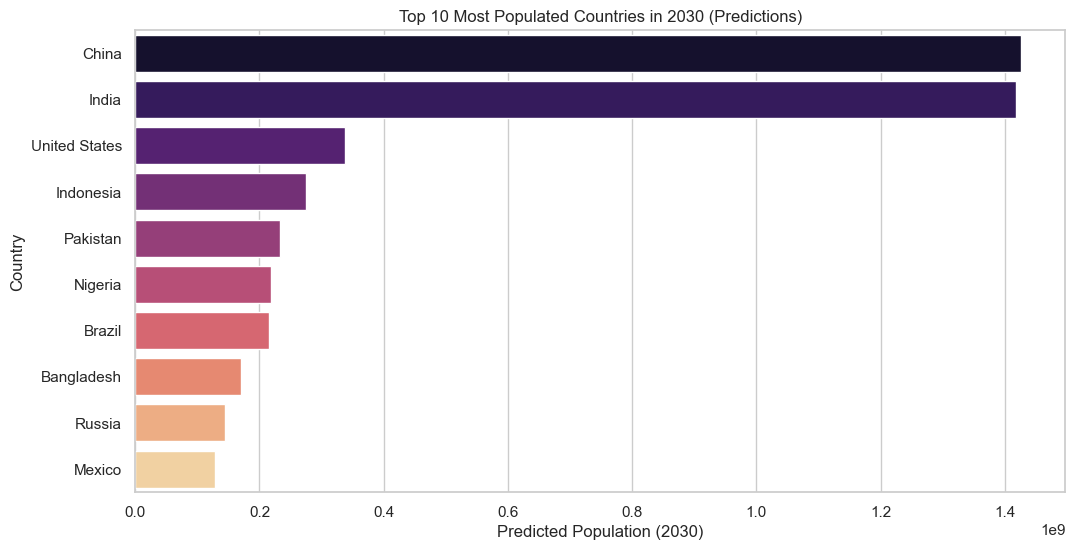

In [108]:
# Top 10 Most Populated Countries in 2030 (Predictions)
top_10_predicted = df.nlargest(10, "predicted_2030_population")
plt.figure(figsize=(12, 6))
sns.barplot(x="predicted_2030_population", y="country", data=top_10_predicted, palette="magma")
plt.xlabel("Predicted Population (2030)")
plt.ylabel("Country")
plt.title("Top 10 Most Populated Countries in 2030 (Predictions)")
plt.show()